In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Carregar Excel

In [ ]:
file_path = "/workspaces/ANALISES-DE-DADOS/Analise de PCM/2025/02/Dados/Problema B90/dados.xlsx"
xls = pd.ExcelFile(file_path)
#Nomes da planilha
xls.sheet_names


['B90']

In [1]:
# Dados da planilha "B90"
df = pd.read_excel(xls, sheet_name="B90")
df.head()


NameError: name 'pd' is not defined

Os dados incluem informações sobre ordens de serviço corretivas, com detalhes como dados de início e fim, tipo de manutenção, máquina envolvida, setor e descrição do problema.

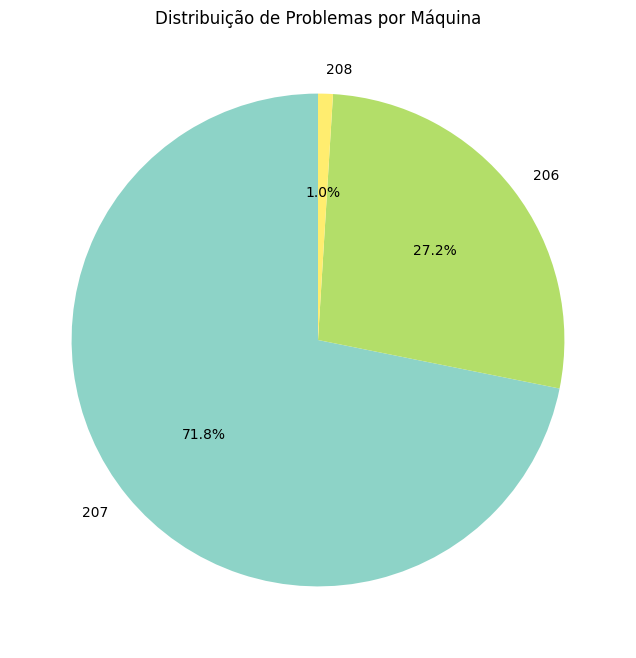

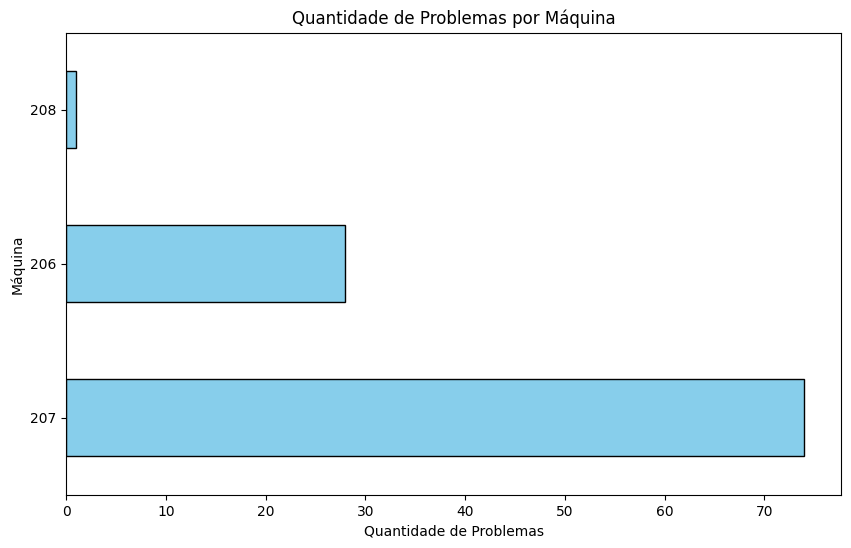

/tmp/ipykernel_23706/3022095434.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Mês"], palette="viridis", edgecolor="black")


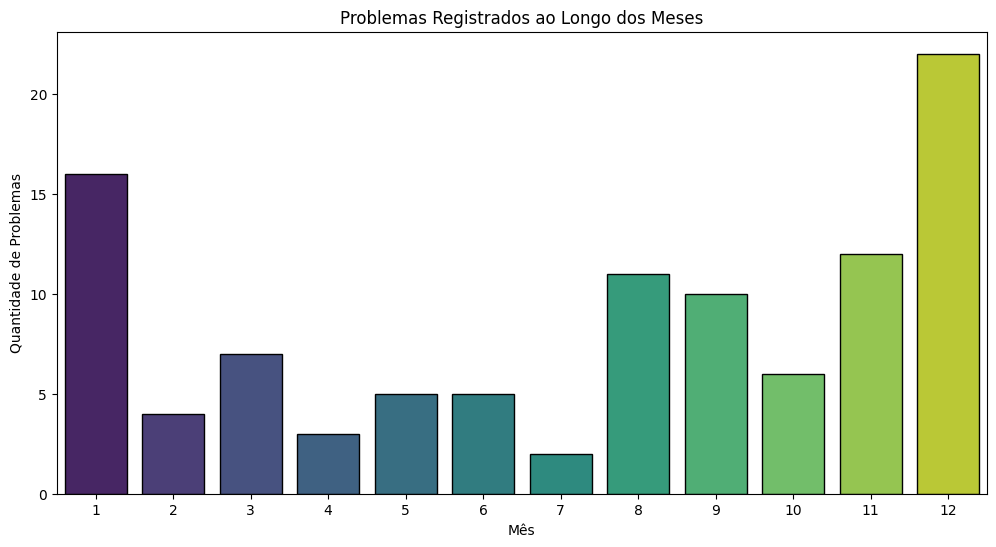

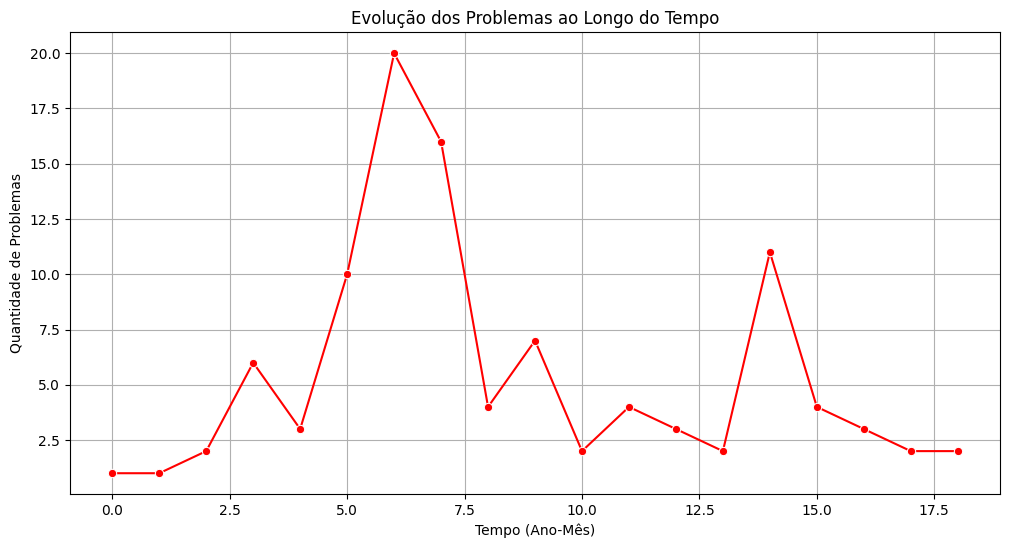

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Colunas para datatime
df["Data Início"] = pd.to_datetime(df["Data Início"])
df["Data Final"] = pd.to_datetime(df["Data Final"])

# Colunas auxiliares
df["Ano"] = df["Data Início"].dt.year
df["Mês"] = df["Data Início"].dt.month

# Colunas com Periodos
dados_jul_dez = df[df["Mês"].between(7, 12)]
dados_jan_todos = df[df["Mês"] == 1]
dados_problemas_jan_jun = df[df["Mês"].between(1, 6)]

# Contagem de ocorrências por máquina para determinar a mais e menos problemática
maquina_mais_problemas = df["Máquina"].value_counts().idxmax()
maquina_menos_problemas = df["Máquina"].value_counts().idxmin()


# Gráfico de pizza - Distribuição de problemas por máquina
plt.figure(figsize=(8, 8))
df["Máquina"].value_counts().plot.pie(autopct='%1.1f%%', cmap="Set3", startangle=90)
plt.title("Distribuição de Problemas por Máquina")
plt.ylabel("")
plt.show()

# Gráfico de barras horizontais - Contagem de problemas por máquina
plt.figure(figsize=(10, 6))
df["Máquina"].value_counts().plot(kind="barh", color="skyblue", edgecolor="black")
plt.xlabel("Quantidade de Problemas")
plt.ylabel("Máquina")
plt.title("Quantidade de Problemas por Máquina")
plt.show()

# Gráfico de barras verticais - Problemas ao longo dos meses
plt.figure(figsize=(12, 6))
sns.countplot(x=df["Mês"], palette="viridis", edgecolor="black")
plt.xlabel("Mês")
plt.ylabel("Quantidade de Problemas")
plt.title("Problemas Registrados ao Longo dos Meses")
plt.show()

# Gráfico de linearidade - Evolução dos problemas ao longo do tempo
problemas_por_mes = df.groupby(["Ano", "Mês"]).size().reset_index(name="Contagem")
plt.figure(figsize=(12, 6))
sns.lineplot(x=problemas_por_mes.index, y=problemas_por_mes["Contagem"], marker="o", color="red")
plt.xlabel("Tempo (Ano-Mês)")
plt.ylabel("Quantidade de Problemas")
plt.title("Evolução dos Problemas ao Longo do Tempo")
plt.grid(True)
plt.show()



Relatório de Ocorrências da B90
Período Julho - Dezembro (Todos os Anos):

    Total de ocorrências: 63

Ocorrências no Mês de Janeiro (Todos os Anos):

    Total de ocorrências: 16

Problemas Registrados de Janeiro a Junho (Todos os Anos):

    Total de ocorrências: 40
    
Máquina com Mais Problemas: 207 ( 74 ocorrências )

Máquina com Menos Problemas: 208 ( 1 ocorrência )

/tmp/ipykernel_23706/1591058380.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=problemas_por_ano.index, y=problemas_por_ano.values, palette="coolwarm", edgecolor="black")


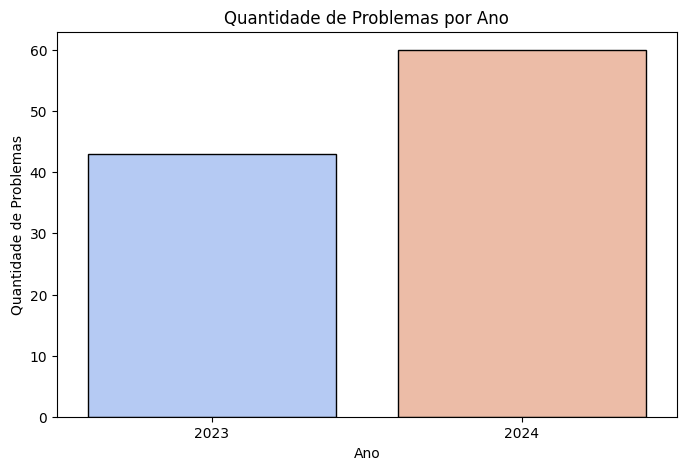

In [ ]:
#  dados por ano
dados_por_ano = df[df["Ano"].isin([2022, 2023, 2024, 2025])]

# problemas por ano
problemas_por_ano = dados_por_ano["Ano"].value_counts().sort_index()

# Problemas por ano
plt.figure(figsize=(8, 5))
sns.barplot(x=problemas_por_ano.index, y=problemas_por_ano.values, palette="coolwarm", edgecolor="black")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Problemas")
plt.title("Quantidade de Problemas por Ano")
plt.show()



Relatório de Ocorrências da B90
    Período Julho - Dezembro (Todos os Anos):
        Total de ocorrências: 63

    Ocorrências no Mês de Janeiro (Todos os Anos):

        Total de ocorrências: 16

    Problemas Registrados de Janeiro a Junho (Todos os Anos):

        Total de ocorrências: 40
        
    Máquina com Mais Problemas: 207 ( 74 ocorrências )

    Máquina com Menos Problemas: 208 ( 1 ocorrência )

    Quantidade de Problemas por Ano:

        2023: 43 ocorrências
        2024: 60 ocorrências